# Random Forest


In [1]:
# importing variables from pre processing
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r label

In [2]:
# importing libraries for visualization
import matplotlib.pyplot as plt

# Training Model

In [3]:
#importing libraries for training model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as cuRfc

In [4]:
rfc = cuRfc(n_estimators=500, random_state=42)

In [5]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [6]:
y_pred = rfc.predict(X_test)

# Evaluating model

In [7]:
# importing libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [8]:
# Evaluating precision
RF_precision = precision_score(y_test, y_pred)
print("Precision: ",RF_precision)

Precision:  0.9819639278557114


In [9]:
# Evaluating recall score
RF_recall = recall_score(y_test, y_pred)
print("Recall Score: ",RF_recall)

Recall Score:  0.98


In [10]:
# Evaluating accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",RF_accuracy)

Accuracy:  0.981


In [11]:
# Evaluating f1 score
RF_f1 = f1_score(y_test, y_pred)
print("F1 Score: ",RF_f1)

F1 Score:  0.9809809809809811


In [12]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)

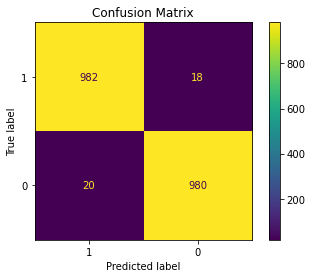

In [13]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=label)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

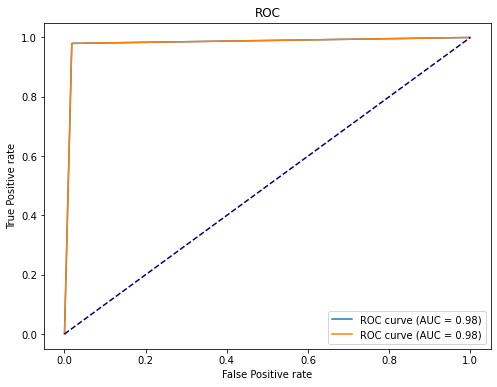

In [14]:
# Evaluate the roc

# compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label)):
    fpr[i], tpr[i], _ = roc_curve(y_test,y_pred)
    roc_auc[i]=auc(fpr[i],tpr[i])

# plot the Roc curve for each class
plt.figure(figsize=(8,6))
for i in range(len(label)):
    plt.plot(fpr[i],tpr[i], label='ROC curve (AUC = %0.2f)' % roc_auc[i])
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [15]:
# saving the metrics for comparision
%store RF_accuracy
%store RF_precision
%store RF_recall
%store RF_f1

Stored 'RF_accuracy' (float64)
Stored 'RF_precision' (float64)
Stored 'RF_recall' (float64)
Stored 'RF_f1' (float64)
